In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from pycwt import cwt,xwt,wct,wct_significance,wavelet,Morlet
import matplotlib.dates as mdates
import pandas as pd
import os
from scipy.signal import detrend

path_flt = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/lancos_filter/intraseasonal/"
files_flt = sorted([f for f in os.listdir(path_flt) if f.endswith(".nc")])
ds_flt = [xr.open_dataset(path_flt+files_flt[i]) for i in range(7)]

#### kanyakumar kollam

In [2]:
ds5 = ds_flt[5].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[0][0]
c1e = continuous_segments[0][1]
print(continuous_segments,c1s,c1e,c1s-c1e)

bm1 = ds_flt[5].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
kol = detrend(bm1) 
kan = detrend(cu1)

coh1,pha1,coi1,freq1,sig951 = wct(kan,kol,dt=4,dj=1/8,J=60,sig=True,significance_level=0.95,wavelet='morlet',cache=False)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

[(100, 1835)] 100 1835 -1735
Calculating wavelet coherence significance


100%|███████████████████████████████████████████████████████| 300/300 [03:14<00:00,  1.54it/s]


In [4]:
time1 = ds_flt[6].AX006[c1s:c1e].values

In [8]:
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })
dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_5kol_intsn_coh.nc")


#### Kanyakumari -- udupi

In [9]:
ds5 = ds_flt[4].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[0][0]
c1e = continuous_segments[0][1]
print(continuous_segments,c1s,c1e,c1e-c1s)

bm1 = ds_flt[4].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
udu = detrend(bm1) 
kan = detrend(cu1)



[(100, 1075), (1711, 1835)] 100 1075 975


In [10]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,udu,dt=4,dj=1/8,J=60,s0=8,sig=True,significance_level=0.95,wavelet='morlet',cache=False,normalize=True)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

Calculating wavelet coherence significance


100%|███████████████████████████████████████████████████████| 300/300 [03:31<00:00,  1.42it/s]


In [11]:
time1 = ds_flt[6].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_4udu_intsn_coh.nc")

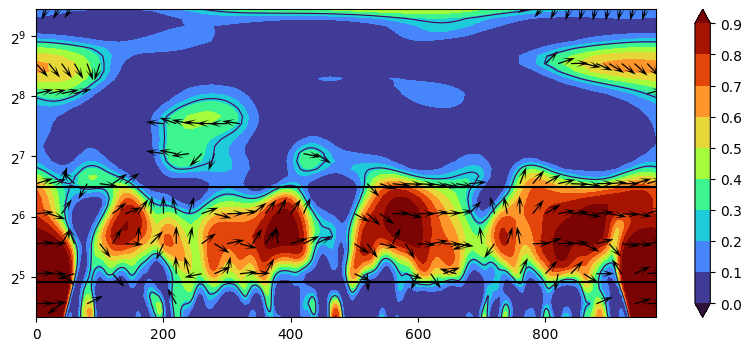

In [12]:
pha2 = np.where(coh1 < 0.5, np.nan, pha1)
angle = pha2
u, v = np.cos(angle), np.sin(angle)

plt.figure(figsize=(10,4))
x=plt.contourf(np.arange(0,len(bm1),1),1/freq1,cross_power1,cmap="turbo",levels=np.arange(0,1,0.1),extend="both")
plt.quiver(np.arange(0,len(bm1),20),1/freq1[::4],u[::4,::20], v[::4,::20], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.002,headwidth=6, headlength=10, headaxislength=5, minshaft=0.05, minlength=2.5)
plt.contour(np.arange(0,len(bm1),1),1/freq1,coh1,levels=[0.51],linewidths=0.8)

plt.yscale("log",base=2)

plt.axhline(30,color='k')
plt.axhline(90,color='k')
plt.ylim(20,700)
plt.colorbar(x)


###### UDUPI 2

In [62]:
ds5 = ds_flt[4].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[1][0]
c1e = continuous_segments[1][1]
print(continuous_segments,c1s,c1e,c1e-c1s)

bm1 = ds_flt[4].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
udu = detrend(bm1) 
kan = detrend(cu1)



[(100, 1075), (1711, 1835)] 1711 1835 124


In [64]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,udu,dt=4,dj=1/8,J=60,s0=8,sig=False,significance_level=0.95,wavelet='morlet',cache=False,normalize=True)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

/tmp/ipykernel_103103/4196897384.py:4: RuntimeWarning: divide by zero encountered in divide
  cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1


In [65]:
time1 = ds_flt[6].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_4udu_intsn_coh_2.nc")

#### kanyakumari--goa

In [13]:
ds5 = ds_flt[3].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[0][0]
c1e = continuous_segments[0][1]
print(continuous_segments,c1s,c1e,c1s-c1e)

bm1 = ds_flt[3].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
goa = detrend(bm1) 
kan = detrend(cu1)


[(100, 1835)] 100 1835 -1735


In [14]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,goa,dt=4,dj=1/8,J=60,sig=True,significance_level=0.95,wavelet='morlet',cache=False)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

Calculating wavelet coherence significance


100%|███████████████████████████████████████████████████████| 300/300 [03:08<00:00,  1.59it/s]


In [15]:
time1 = ds_flt[5].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_3goa_intsn_coh.nc")


#### kanyakumari -- jaigarh

In [16]:
ds5 = ds_flt[2].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[0][0]
c1e = continuous_segments[0][1]
print(continuous_segments,c1s,c1e,c1s-c1e)

bm1 = ds_flt[2].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
jai = detrend(bm1) 
kan = detrend(cu1)


[(115, 667), (1245, 1524)] 115 667 -552


In [17]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,jai,dt=4,dj=1/8,J=60,sig=False,significance_level=0.95,wavelet='morlet',cache=False)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

/tmp/ipykernel_103103/15789742.py:4: RuntimeWarning: divide by zero encountered in divide
  cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1


In [18]:
time1 = ds_flt[6].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_2jai_intsn_coh.nc")


In [70]:
####### JAIGARH 2

In [71]:
ds5 = ds_flt[2].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[1][0]
c1e = continuous_segments[1][1]
print(continuous_segments,c1s,c1e,c1s-c1e)

bm1 = ds_flt[2].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
jai = detrend(bm1) 
kan = detrend(cu1)


[(115, 667), (1245, 1524)] 1245 1524 -279


In [72]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,jai,dt=4,dj=1/8,J=60,sig=False,significance_level=0.95,wavelet='morlet',cache=False)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

/tmp/ipykernel_103103/15789742.py:4: RuntimeWarning: divide by zero encountered in divide
  cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1


In [73]:
time1 = ds_flt[6].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_2jai_intsn_coh_2.nc")


#### kanyakumari --mumbai 

In [38]:
ds5 = ds_flt[1].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[0][0]
c1e = continuous_segments[0][1]
print(continuous_segments,c1s,c1e,c1s-c1e)

bm1 = ds_flt[1].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
mum = detrend(bm1) 
kan = detrend(cu1)


[(128, 1835)] 128 1835 -1707


In [39]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,mum,dt=4,dj=1/8,J=60,sig=True,significance_level=0.95,wavelet='morlet',cache=False)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

Calculating wavelet coherence significance


100%|███████████████████████████████████████████████████████| 300/300 [03:09<00:00,  1.58it/s]


In [42]:
time1 = ds_flt[6].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_1mum_intsn_coh.nc")


#### kanyakumari-okha

In [2]:
ds5 = ds_flt[0].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[1][0]
c1e = continuous_segments[1][1]
print(continuous_segments,c1s,c1e,c1s-c1e)

bm1 = ds_flt[0].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
okh = detrend(bm1) 
kan = detrend(cu1)


[(459, 699), (1249, 1835)] 1249 1835 -586


In [3]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,okh,dt=4,dj=1/8,J=60,sig=False,significance_level=0.95,wavelet='morlet',cache=False)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

/tmp/ipykernel_106568/1933070991.py:4: RuntimeWarning: divide by zero encountered in divide
  cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1


In [4]:
time1 = ds_flt[6].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_0okh_intsn_coh.nc")


###### OKHA 2

In [12]:
ds5 = ds_flt[0].INTSN[:,6,0,0]
ds6 = ds_flt[6].INTSN[:,6,0,0]# Step 2: Find where both datasets have non-NaN values
common_non_nan = ~ds5.isnull() & ~ds6.isnull()
# Step 3: Get the indices of common non-NaN values
indices = np.where(common_non_nan)[0]

continuous_segments = []
current_segment = [indices[0]]

for i in range(1, len(indices)):
    if indices[i] == indices[i-1] + 1:
        current_segment.append(indices[i])
    else:
        continuous_segments.append((current_segment[0], current_segment[-1]))
        current_segment = [indices[i]]

# Append the last segment
continuous_segments.append((current_segment[0], current_segment[-1]))

c1s = continuous_segments[0][0]
c1e = continuous_segments[0][1]
print(continuous_segments,c1s,c1e,c1s-c1e)

bm1 = ds_flt[0].INTSN[c1s:c1e,6,0,0].values
cu1 = ds_flt[6].INTSN[c1s:c1e,6,0,0].values
# detrend the data
okh = detrend(bm1) 
kan = detrend(cu1)


[(459, 699), (1249, 1835)] 459 699 -240


In [13]:
coh1,pha1,coi1,freq1,sig951 = wct(kan,okh,dt=4,dj=1/8,J=60,sig=False,significance_level=0.95,wavelet='morlet',cache=False)    
cross_power1 = np.abs(coh1)**2
cross_sig1 = np.ones([1, len(bm1)]) * sig951[:, None]
cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1

/tmp/ipykernel_106568/1933070991.py:4: RuntimeWarning: divide by zero encountered in divide
  cross_sig1 = cross_power1 / cross_sig1  # Power is significant where ratio > 1


In [14]:
time1 = ds_flt[6].AX006[c1s:c1e].values
coh1 = xr.DataArray(
        data=coh1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
sig1 = xr.DataArray(
        data=cross_sig1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})   
coi1 = xr.DataArray(
        data=coi1,
        dims=["time"],
        coords={'time':time1})
pha1 = xr.DataArray(
        data=pha1,
        dims=["period","time"],
        coords={"period":1/freq1,'time':time1})
dsnew = xr.Dataset({
        'coh1': coh1,
        'sig1':sig1,
        'pha1': pha1,
        'coi1': coi1,
    })

dsnew.to_netcdf("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_0okh_intsn_coh_2.nc")

### plotting


#### adjacent mooring coherence

In [52]:
ds_kk = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_5kol_intsn_coh.nc")

ds_ku = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/5kol_4udu_intsn_coh.nc")
ds_ku2 = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/5kol_4udu_intsn_coh_2.nc")

ds_ug = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/4udu_3goa_intsn_coh.nc")
ds_ug2 = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/4udu_3goa_intsn_coh_2.nc")

ds_gj = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/3goa_2jai_intsn_coh.nc")
ds_gj2 = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/3goa_2jai_intsn_coh_2.nc")

ds_jm = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/2jai_1mum_intsn_coh.nc")
ds_mo = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/1mum_0okha_intsn_coh.nc")

In [53]:
customticks = [30,90,180,360]
#customticks = [np.log2(e) for e in customticks]
customlabel = ["30","90","180","360"]
labe = ["Mum-Okh","Jai-Mum","Goa-jai","Udu-Goa","Kol-Udu","Kan-Kol"]

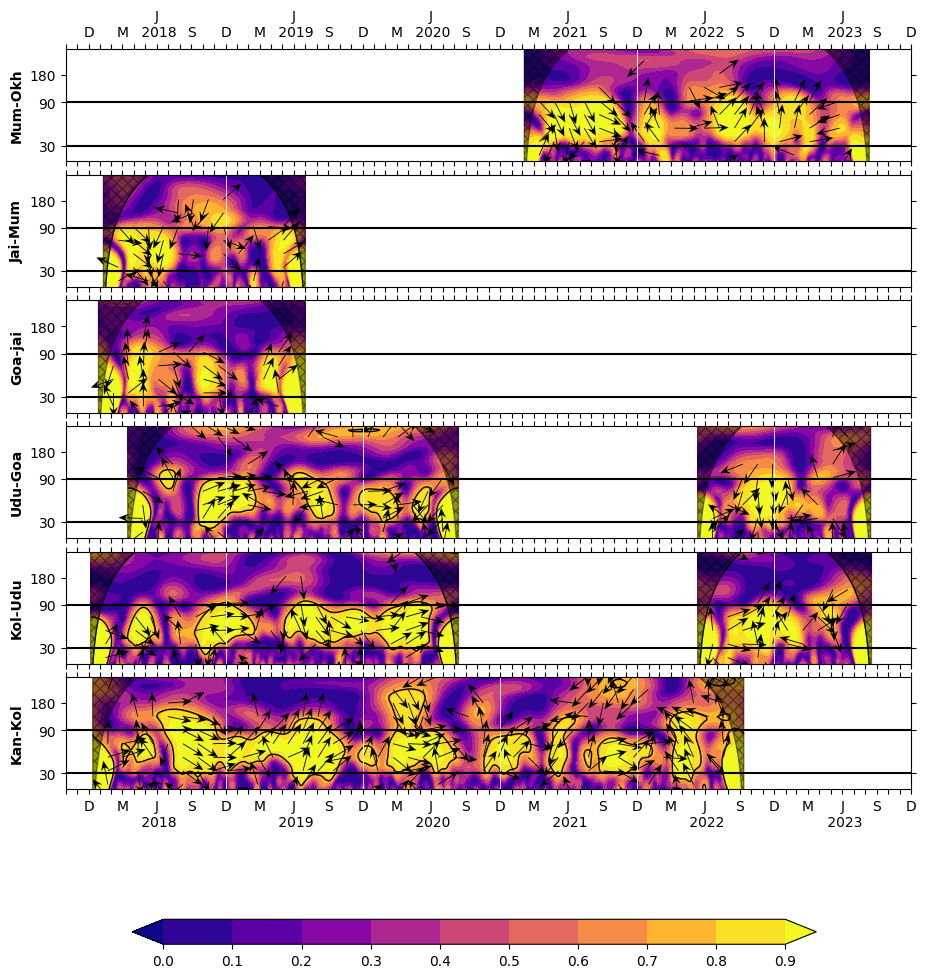

In [51]:
fig, ax = plt.subplots(nrows=6,ncols=1,figsize=(9.5,10),sharey=True,sharex=True)
#names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
plt.subplots_adjust(wspace=0.075,left=0.07,bottom=0.18,top=0.92,
                    hspace=0.12,right = 0.96)

ax[0].contourf(ds_mo.time,ds_mo.period,ds_mo.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_mo.coh1 < 0.5, np.nan, ds_mo.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[0].quiver(ds_mo.time[40:-40:40],ds_mo.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[0].contour(ds_mo.time,ds_mo.period,ds_mo.coh1,levels=[0.51],linewidths=0.8)
ax[0].fill_between(ds_mo.time, ds_mo.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_mo.time.min(), ds_mo.time.max(), 0, max(ds_mo.period)]
ax[0].contour(ds_mo.time, ds_mo.period, ds_mo.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

figcol = ax[1].contourf(ds_jm.time,ds_jm.period,ds_jm.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[1].contour(ds_jm.time,ds_jm.period,ds_jm.coh1,levels=[0.75],linewidths=1,colors="white")
ax[1].plot(ds_jm.time, ds_jm.coi1,16,color='k',linewidth=0.8)
ax[1].fill_between(ds_jm.time, ds_jm.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_jm.coh1 < 0.5, np.nan, ds_jm.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[1].quiver(ds_jm.time[40:-40:40],ds_jm.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_jm.time.min(), ds_jm.time.max(), 0, max(ds_jm.period)]
ax[1].contour(ds_jm.time, ds_jm.period, ds_jm.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)


ax[2].contourf(ds_gj.time,ds_gj.period,ds_gj.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_gj.coh1 < 0.5, np.nan, ds_gj.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[2].quiver(ds_gj.time[40:-40:40],ds_gj.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[2].contour(ds_gj.time,ds_gj.period,ds_gj.coh1,levels=[0.51],linewidths=0.8)
ax[2].fill_between(ds_gj.time, ds_gj.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_gj.time.min(), ds_gj.time.max(), 0, max(ds_gj.period)]
ax[2].contour(ds_gj.time, ds_gj.period, ds_gj.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)



ax[3].contourf(ds_ug.time,ds_ug.period,ds_ug.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_ug.coh1 < 0.5, np.nan, ds_ug.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[3].quiver(ds_ug.time[40:-40:40],ds_ug.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[3].contour(ds_ug.time,ds_ug.period,ds_ug.coh1,levels=[0.51],linewidths=0.8)
ax[3].fill_between(ds_ug.time, ds_ug.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_ug.time.min(), ds_ug.time.max(), 0, max(ds_ug.period)]
ax[3].contour(ds_ug.time, ds_ug.period, ds_ug.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

ax[3].contourf(ds_ug2.time,ds_ug2.period,ds_ug2.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_ug2.coh1 < 0.5, np.nan, ds_ug2.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[3].quiver(ds_ug2.time[40:-40:40],ds_ug2.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[3].contour(ds_ug2.time,ds_ug2.period,ds_ug2.coh1,levels=[0.51],linewidths=0.8)
ax[3].fill_between(ds_ug2.time, ds_ug2.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_ug2.time.min(), ds_ug2.time.max(), 0, max(ds_ug2.period)]
ax[3].contour(ds_ug2.time, ds_ug2.period, ds_ug2.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)



ax[4].contourf(ds_ku.time,ds_ku.period,ds_ku.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[4].contour(ds_ku.time,ds_ku.period,ds_ku.coh1,levels=[0.75],linewidths=1,colors="white")
ax[4].plot(ds_ku.time, ds_ku.coi1,16,color='k',linewidth=0.8)
ax[4].fill_between(ds_ku.time, ds_ku.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_ku.coh1 < 0.5, np.nan, ds_ku.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[4].quiver(ds_ku.time[40:-40:40],ds_ku.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_ku.time.min(), ds_ku.time.max(), 0, max(ds_ku.period)]
ax[4].contour(ds_ku.time, ds_ku.period, ds_ku.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

ax[4].contourf(ds_ku2.time,ds_ku2.period,ds_ku2.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[4].contour(ds_ku2.time,ds_ku2.period,ds_ku2.coh1,levels=[0.75],linewidths=1,colors="white")
ax[4].plot(ds_ku2.time, ds_ku2.coi1,16,color='k',linewidth=0.8)
ax[4].fill_between(ds_ku2.time, ds_ku2.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_ku2.coh1 < 0.5, np.nan, ds_ku2.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[4].quiver(ds_ku2.time[40:-40:40],ds_ku2.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_ku2.time.min(), ds_ku2.time.max(), 0, max(ds_ku2.period)]
ax[4].contour(ds_ku2.time, ds_ku2.period, ds_ku2.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)


ax[5].contourf(ds_kk.time,ds_kk.period,ds_kk.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_kk.coh1 < 0.5, np.nan, ds_kk.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[5].quiver(ds_kk.time[40:-40:40],ds_kk.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[5].contour(ds_kk.time,ds_kk.period,ds_kk.coh1,levels=[0.51],linewidths=0.8)
ax[5].fill_between(ds_kk.time, ds_kk.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_kk.time.min(), ds_kk.time.max(), 0, max(ds_kk.period)]
ax[5].contour(ds_kk.time, ds_kk.period, ds_kk.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)


dsm = ds_flt[1].resample(AX006='ME').mean()

for i in range(6):
    tklb = []
    tklb_top = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
            tklb_top.append(f'{yrlb}\n {monlb[0]}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
            tklb_top.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            tklb_top.append(f'{monlb[0]}')
            ax[i].axvline(t,color='w',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
            tklb_top.append(f'{monlb[0]}')
        else: 
            tklb.append("")
            tklb_top.append("")

    ax[i].set_xlim(xmin=np.array('2017-11-01T00:00:00', dtype='datetime64[ns]'),xmax=np.array('2023-12-20T11:00:00', dtype='datetime64[ns]'))
    ax[i].set_yscale("log",base=2)
    ax[i].axhline(30,color='k')
    ax[i].axhline(90,color='k')
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].set_ylim(20,350)

    if i!= 0 or i != 5:
        ax[i].set_ylabel(labe[i],fontweight="bold")
        ax[i].set_xticks(dsm.AX006,tklb_top)      
        ax[i].tick_params(right=True, top=True,labeltop=False,labelbottom=False)
    
ax[0].set_ylabel(labe[0],fontweight="bold")
ax[0].set_xticks(dsm.AX006,tklb_top)      
ax[0].tick_params(right=True, top=True,labeltop=True,labelbottom=False)

ax[5].set_ylabel(labe[5],fontweight="bold")
ax[5].set_xticks(dsm.AX006,tklb)
ax[5].tick_params(right=True, top=True,labelbottom=True)

cax = fig.add_axes([0.14, 0.025, 0.72,0.025])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/intraseasonal_coherence.png",dpi=300)


#### kanyakumari and other mooring coherence

In [15]:
ds_kk = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_5kol_intsn_coh.nc")
ds_ku = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_4udu_intsn_coh.nc")
ds_ku2 = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_4udu_intsn_coh_2.nc")

ds_kg = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_3goa_intsn_coh.nc")
ds_kj = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_2jai_intsn_coh.nc")
ds_kj2 = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_2jai_intsn_coh_2.nc")

ds_km = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_1mum_intsn_coh.nc")
ds_ko = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_0okh_intsn_coh.nc")
ds_ko2 = xr.open_dataset("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/6kan_0okh_intsn_coh_2.nc")

In [16]:
customticks = [30,90,180,360]
#customticks = [np.log2(e) for e in customticks]
customlabel = ["30","90","180","360"]
labe = ["Kan-Okh","Kan-Mum","Kan-jai","Kan-Goa","Kan-Udu","Kan-Kol"]

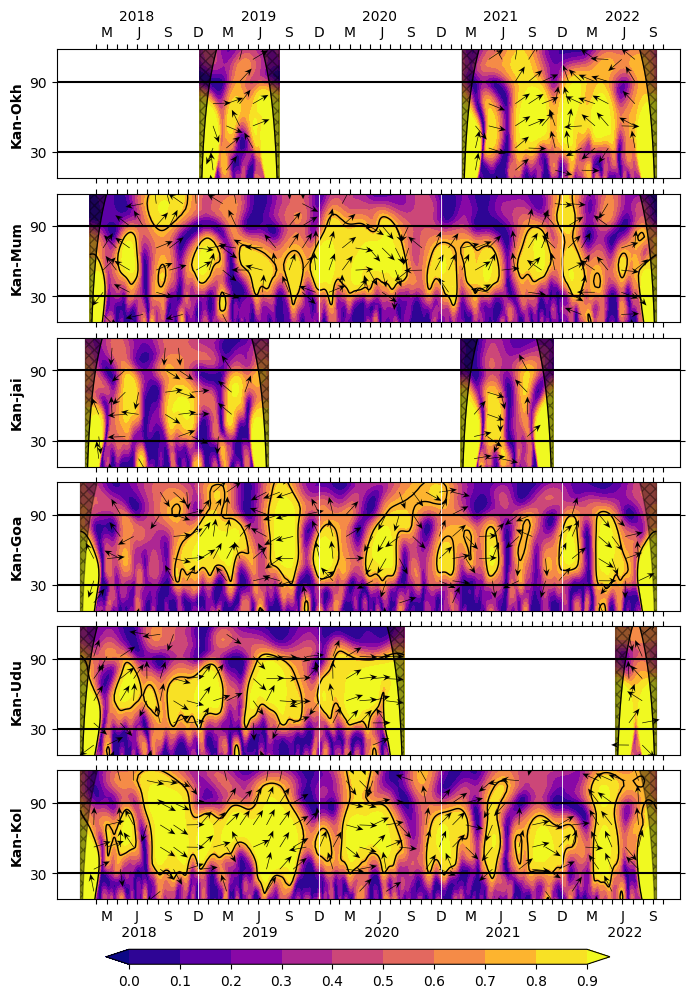

In [34]:
fig, ax = plt.subplots(nrows=6,ncols=1,figsize=(7,10),sharey=True)
#names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
plt.subplots_adjust(wspace=0.075,left=0.07,bottom=0.1,top=0.95,
                    hspace=0.12,right = 0.96)
#####################################################################################################################

figcol = ax[0].contourf(ds_ko.time,ds_ko.period,ds_ko.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[0].contour(ds_ko.time,ds_ko.period,ds_ko.coh1,levels=[0.75],linewidths=1,colors="white")
ax[0].plot(ds_ko.time, ds_ko.coi1,16,color='k',linewidth=0.8)
ax[0].fill_between(ds_ko.time, ds_ko.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_ko.coh1 < 0.5, np.nan, ds_ko.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[0].quiver(ds_ko.time[40:-40:40],ds_ko.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_ko.time.min(), ds_ko.time.max(), 0, max(ds_ko.period)]
ax[0].contour(ds_ko.time, ds_ko.period, ds_ko.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

figcol = ax[0].contourf(ds_ko2.time,ds_ko2.period,ds_ko2.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[0].contour(ds_ko2.time,ds_ko2.period,ds_ko2.coh1,levels=[0.75],linewidths=1,colors="white")
ax[0].plot(ds_ko2.time, ds_ko2.coi1,16,color='k',linewidth=0.8)
ax[0].fill_between(ds_ko2.time, ds_ko2.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_ko2.coh1 < 0.5, np.nan, ds_ko2.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[0].quiver(ds_ko2.time[40:-40:40],ds_ko2.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_ko2.time.min(), ds_ko2.time.max(), 0, max(ds_ko2.period)]
ax[0].contour(ds_ko2.time, ds_ko2.period, ds_ko2.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)


#####################################################################################################################

figcol = ax[1].contourf(ds_km.time,ds_km.period,ds_km.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[1].contour(ds_km.time,ds_km.period,ds_km.coh1,levels=[0.75],linewidths=1,colors="white")
ax[1].plot(ds_km.time, ds_km.coi1,16,color='k',linewidth=0.8)
ax[1].fill_between(ds_km.time, ds_km.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_km.coh1 < 0.5, np.nan, ds_km.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[1].quiver(ds_km.time[40:-40:40],ds_km.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_km.time.min(), ds_km.time.max(), 0, max(ds_km.period)]
ax[1].contour(ds_km.time, ds_km.period, ds_km.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

#####################################################################################################################

ax[2].contourf(ds_kj.time,ds_kj.period,ds_kj.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[2].contour(ds_kj.time,ds_kj.period,ds_kj.coh1,levels=[0.75],linewidths=1,colors="white")
ax[2].plot(ds_kj.time, ds_kj.coi1,16,color='k',linewidth=0.8)
ax[2].fill_between(ds_kj.time, ds_kj.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_kj.coh1 < 0.5, np.nan, ds_kj.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[2].quiver(ds_kj.time[40:-40:40],ds_kj.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_kj.time.min(), ds_kj.time.max(), 0, max(ds_kj.period)]
ax[2].contour(ds_kj.time, ds_kj.period, ds_kj.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

ax[2].contourf(ds_kj2.time,ds_kj2.period,ds_kj2.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
#ax[2].contour(ds_kj2.time,ds_kj2.period,ds_kj2.coh1,levels=[0.75],linewidths=1,colors="white")
ax[2].plot(ds_kj2.time, ds_kj2.coi1,16,color='k',linewidth=0.8)
ax[2].fill_between(ds_kj2.time, ds_kj2.coi1,1600,color='k',alpha=0.4,hatch='xxx')
angle = np.where(ds_kj2.coh1 < 0.5, np.nan, ds_kj2.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[2].quiver(ds_kj2.time[40:-40:40],ds_kj2.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
extent = [ds_kj2.time.min(), ds_kj2.time.max(), 0, max(ds_kj2.period)]
ax[2].contour(ds_kj2.time, ds_kj2.period, ds_kj2.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)
#####################################################################################################################

ax[3].contourf(ds_kg.time,ds_kg.period,ds_kg.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_kg.coh1 < 0.5, np.nan, ds_kg.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[3].quiver(ds_kg.time[40:-40:40],ds_kg.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[3].contour(ds_kg.time,ds_kg.period,ds_kg.coh1,levels=[0.51],linewidths=0.8)
ax[3].fill_between(ds_kg.time, ds_kg.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_kg.time.min(), ds_kg.time.max(), 0, max(ds_kg.period)]
ax[3].contour(ds_kg.time, ds_kg.period, ds_kg.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

#####################################################################################################################

ax[4].contourf(ds_ku.time,ds_ku.period,ds_ku.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_ku.coh1 < 0.5, np.nan, ds_ku.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[4].quiver(ds_ku.time[40:-40:40],ds_ku.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[4].contour(ds_ku.time,ds_ku.period,ds_ku.coh1,levels=[0.75],linewidths=1,colors="white")
ax[4].plot(ds_ku.time, ds_ku.coi1,16,color='k',linewidth=0.8)
ax[4].fill_between(ds_ku.time, ds_ku.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_ku.time.min(), ds_ku.time.max(), 0, max(ds_ku.period)]
ax[4].contour(ds_ku.time, ds_ku.period, ds_ku.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

ax[4].contourf(ds_ku2.time,ds_ku2.period,ds_ku2.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_ku2.coh1 < 0.5, np.nan, ds_ku2.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[4].quiver(ds_ku2.time[40:-40:40],ds_ku2.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[4].contour(ds_ku2.time,ds_ku2.period,ds_ku2.coh1,levels=[0.75],linewidths=1,colors="white")
ax[4].plot(ds_ku2.time, ds_ku2.coi1,16,color='k',linewidth=0.8)
ax[4].fill_between(ds_ku2.time, ds_ku2.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_ku2.time.min(), ds_ku2.time.max(), 0, max(ds_ku2.period)]
ax[4].contour(ds_ku2.time, ds_ku2.period, ds_ku2.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)

#####################################################################################################################

ax[5].contourf(ds_kk.time,ds_kk.period,ds_kk.coh1,cmap="plasma",levels=np.arange(0,1,0.1),extend="both")
angle = np.where(ds_kk.coh1 < 0.5, np.nan, ds_kk.pha1)
u, v = np.cos(angle), np.sin(angle)
ax[5].quiver(ds_kk.time[40:-40:40],ds_kk.period[::4],u[::4,40:-40:40], v[::4,40:-40:40], angles='uv', pivot='tail', linewidth=0.051, scale=35, width=0.001,headwidth=10, headlength=12, headaxislength=8,   minshaft=0.05, minlength=2.5)
#ax[5].contour(ds_kk.time,ds_kk.period,ds_kk.coh1,levels=[0.51],linewidths=0.8)
ax[5].fill_between(ds_kk.time, ds_kk.coi1,1600,color='k',alpha=0.4,hatch='xxx')
extent = [ds_kk.time.min(), ds_kk.time.max(), 0, max(ds_kk.period)]
ax[5].contour(ds_kk.time, ds_kk.period, ds_kk.sig1,levels=[-99,1], colors='k', linewidths=1,extent=extent)


dsm = ds_km.resample(time='ME').mean()

for i in range(6):
    tklb = []
    tklb_top = []
    for t in dsm.time.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
            tklb_top.append(f'{yrlb}\n {monlb[0]}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
            tklb_top.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            tklb_top.append(f'{monlb[0]}')
            ax[i].axvline(t,color='w',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
            tklb_top.append(f'{monlb[0]}')
        else: 
            tklb.append("")
            tklb_top.append("")

    ax[i].set_xlim(xmin=np.array('2017-11-01T00:00:00', dtype='datetime64[ns]'),xmax=np.array('2022-12-20T11:00:00', dtype='datetime64[ns]'))
    ax[i].set_yscale("log",base=2)
    ax[i].axhline(30,color='k')
    ax[i].axhline(90,color='k')
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].set_ylim(20,150)
    if i!= 0 or i != 5:
        ax[i].set_ylabel(labe[i],fontweight="bold")
        ax[i].set_xticks(dsm.time,tklb_top)      
        ax[i].tick_params(right=True, top=True,labeltop=False,labelbottom=False)
    
ax[0].set_ylabel(labe[0],fontweight="bold")
ax[0].set_xticks(dsm.time,tklb_top)      
ax[0].tick_params(right=True, top=True,labeltop=True,labelbottom=False)

ax[5].set_ylabel(labe[5],fontweight="bold")
ax[5].set_xticks(dsm.time,tklb)
ax[5].tick_params(right=True, top=True,labelbottom=True)

cax = fig.add_axes([0.14, 0.035, 0.72,0.015])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/filtered_coherence/intraseasonal_coh/intraseasonal_coherence_kanyakumari_rest.png",dpi=300)